In [1]:
import pandas as pd

In [3]:
factors = pd.read_csv('factors.csv')
routes = pd.read_csv('routes_v2.csv')
cities = pd.read_csv('cities.csv')
orders = pd.read_csv('orders.csv')
pack = pd.read_csv('packages.csv')
price = pd.read_csv('pricing.csv')
trucks = pd.read_csv('trucks.csv')
wareh = pd.read_csv('warehouses.csv')

In [4]:
wareh

,warehouse_city
0,Clermont-Ferrand
1,Cergy
2,Reims
3,Avignon
4,Montauban


In [3]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calcule la distance en kilomètres entre deux points (lon1, lat1) et (lon2, lat2) 
    sur une sphère (la Terre) en utilisant la formule de Haversine.
    """
    # Conversion des latitudes et longitudes en radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Calcul des différences de latitude et de longitude
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Calcul de la distance en kilomètres
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6371 * c
    return km

# Initialisation du dataframe 'distance' avec les noms de villes en index et en colonnes
disti = pd.DataFrame(index=cities['city'], columns=cities['city'])

# Calcul de la distance en kilomètres entre chaque paire de villes
for i in cities.index:
    for j in cities.index:
        disti.loc[cities.loc[i,'city'], cities.loc[j,'city']] = haversine(cities.loc[i,'lng'], cities.loc[i,'lat'], cities.loc[j,'lng'], cities.loc[j,'lat'])

# Conversion des distances en nombres décimaux arrondis à 2 décimales
disti = disti.astype(float).round(6)
disti

city,Paris,Nice,Toulouse,Marseille,Rennes,Grenoble,Nantes,Montpellier,Lyon,Rouen,...,Niort,Sarcelles,Pantin,Lorient,Le Blanc-Mesnil,Beauvais,Maisons-Alfort,Hyères,Épinay-sur-Seine,Meaux
city,,,,,,,,,,,,,,,,,,,,,
Paris,0.000000,685.932701,588.157822,660.494275,308.328951,482.786159,342.702025,594.827948,392.047741,112.669040,...,351.637357,15.596691,5.734735,439.934995,12.126891,66.475147,8.436038,701.319641,11.416059,40.842015
Nice,685.932701,0.000000,468.448463,159.502510,847.433143,204.133979,790.410398,272.813797,298.349843,793.316192,...,673.356422,697.442290,687.505298,938.435488,688.901861,749.113323,677.709069,112.295156,696.722073,674.021104
Toulouse,588.157822,468.448463,0.000000,318.738626,556.669655,381.950351,464.863066,195.899592,359.849115,649.756396,...,337.637018,603.753847,593.030451,592.866625,598.252884,649.705773,583.378025,382.712483,598.674075,605.760183
Marseille,660.494275,159.502510,318.738626,0.000000,765.358589,210.382773,695.079110,125.498568,277.140982,757.981418,...,569.858194,674.123058,663.306103,840.465671,666.113807,726.691658,652.939839,64.769924,671.853507,658.095958
Rennes,308.328951,847.433143,556.669655,765.358589,0.000000,652.570095,100.147058,659.805278,559.699041,250.862716,...,219.173347,314.426918,312.935264,131.607318,318.353491,312.863401,313.123878,822.352762,308.149110,349.133825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beauvais,66.475147,749.113323,649.705773,726.691658,312.863401,546.714969,364.963437,661.134077,457.003665,72.798887,...,394.276357,52.600119,63.391145,442.454002,60.798387,0.000000,73.781662,766.919127,55.059244,77.796818
Maisons-Alfort,8.436038,677.709069,583.378025,652.939839,313.123878,474.635091,345.311605,588.029923,384.056777,121.059455,...,351.134506,21.512131,10.436289,444.695886,14.878265,73.781662,0.000000,693.506337,19.099178,37.151852
Hyères,701.319641,112.295156,382.712483,64.769924,822.352762,230.451203,754.762312,190.265890,310.947351,802.373811,...,630.799656,714.353224,703.753626,900.945363,706.126675,766.919127,693.506337,0.000000,712.564661,695.831497


In [4]:
trucks['truck_warehouse'].value_counts()

Clermont-Ferrand    50
Cergy               50
Reims               50
Avignon             50
Montauban           50
Name: truck_warehouse, dtype: int64

=> 50 camions pour chaque warehouse

In [5]:
orders['from_warehouse'].value_counts()

Cergy               19306
Avignon              6726
Reims                5299
Montauban            4125
Clermont-Ferrand     1876
Name: from_warehouse, dtype: int64

Création df join avec orders et leur prix

In [6]:
l=[11,15,39,45]

In [7]:
def revenu(vol):
    j=0
    while vol>price.max_volume[j]:
        j+=1
    prix=price.pricing[j]
    return prix

In [8]:
for i in l:
    pack.loc[i,'package_revenues'] = revenu(pack.package_volume[i]) 
pack

,package_id,package_volume,package_price,package_revenues
0,jjnvac3HYvsrBQp9jxf5qj,1.0615,427.87,69.89
1,3nwbxBUemtMG75cVPs7q7R,1.3451,914.04,69.89
2,CwNUeLRRdqm5DhwCmr743i,0.2867,59.39,20.99
3,6H7ukEuzfShov54gB3sN6V,0.0020,12.87,4.89
4,eMZvEhv2562R9UEzTamYtC,2.7234,1882.33,69.89
5,3nEPuCWc9cUcPerm6aiJcN,1.7734,1339.70,69.89
6,4A8XqQW57uG82xfZ7sjp5F,0.1148,100.11,20.99
7,kAh6oD4y4X3RK3zc5BQeo8,0.0020,5.00,4.89
8,Jor2NusSZhGuk46urjyqqz,0.0020,138.49,4.89
9,aZY3fiBNXajyPoPcgxBmM4,0.0020,5.00,4.89


In [9]:
pack.loc[36,'package_revenues'] = 13.99
pack

,package_id,package_volume,package_price,package_revenues
0,jjnvac3HYvsrBQp9jxf5qj,1.0615,427.87,69.89
1,3nwbxBUemtMG75cVPs7q7R,1.3451,914.04,69.89
2,CwNUeLRRdqm5DhwCmr743i,0.2867,59.39,20.99
3,6H7ukEuzfShov54gB3sN6V,0.0020,12.87,4.89
4,eMZvEhv2562R9UEzTamYtC,2.7234,1882.33,69.89
5,3nEPuCWc9cUcPerm6aiJcN,1.7734,1339.70,69.89
6,4A8XqQW57uG82xfZ7sjp5F,0.1148,100.11,20.99
7,kAh6oD4y4X3RK3zc5BQeo8,0.0020,5.00,4.89
8,Jor2NusSZhGuk46urjyqqz,0.0020,138.49,4.89
9,aZY3fiBNXajyPoPcgxBmM4,0.0020,5.00,4.89


In [10]:
pack.package_revenues.isnull().values.any()

False

In [11]:
orders_price = pd.merge(orders, pack, on="package_id", how="left")
orders_price

,order_id,package_id,package_volume_x,delivery_location,from_warehouse,order_date,delivered_date,n_units,order_total_volume,package_volume_y,package_price,package_revenues
0,EtPmaD3APj8aRNeSC3Yx7R,Z8722BWG8WfyrU3jeWsWGo,0.2732,Nice,Avignon,2021-01-01,2021-01-04 00:00:00,27.0,7.3764,0.2732,87.77,20.99
1,4X4RBUwTXGBMVWdEj8Gti4,4oxrPXkner2kvXqvLQiCXF,0.2384,Issy-les-Moulineaux,Cergy,2021-01-01,2021-01-03 00:00:00,41.0,9.7744,0.2384,5.00,20.99
2,GDhuTcBnr9xdRhFb2jLYcW,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Toulouse,Montauban,2021-01-01,2021-01-08 00:00:00,35.0,49.5320,1.4152,1084.50,69.89
3,3EZDvpzw5DdxXyJ66Py75J,3nwbxBUemtMG75cVPs7q7R,1.3451,Poitiers,Montauban,2021-01-01,2021-01-09 00:00:00,21.0,28.2471,1.3451,914.04,69.89
4,Fpvw9NfnexSxjzLvyPWKbQ,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Épinal,Reims,2021-01-01,2021-01-09 00:00:00,22.0,31.1344,1.4152,1084.50,69.89
...,...,...,...,...,...,...,...,...,...,...,...,...
37327,8QVSak34zC2xgTpHSirnei,Z8722BWG8WfyrU3jeWsWGo,0.2732,Colombes,Cergy,2021-06-29,NaN,10.0,2.7320,0.2732,87.77,20.99
37328,3JuWiSMrsXLnh8UzR34uzr,bfvaknKja6jMJYp56vtjgf,0.0072,Lille,Reims,2021-06-29,NaN,22.0,0.1584,0.0072,5.00,13.99
37329,VaqbTgtahJZEcrUnSepiGG,KmBprCffsWobByaWonfSXN,0.0485,Montpellier,Avignon,2021-06-29,NaN,41.0,1.9885,0.0485,5.00,20.99
37330,4tzaEQGmAUmvMiEpcBnTfB,3CCHeWCD6EnM24iAxbCfCr,1.5890,Dunkerque,Cergy,2021-06-29,NaN,18.0,28.6020,1.5890,1159.02,69.89


In [12]:
orders_price=orders_price.assign(order_revenu=[orders_price.n_units[i]*orders_price.package_revenues[i] for i in range(len(orders_price.n_units))])
orders_price

,order_id,package_id,package_volume_x,delivery_location,from_warehouse,order_date,delivered_date,n_units,order_total_volume,package_volume_y,package_price,package_revenues,order_revenu
0,EtPmaD3APj8aRNeSC3Yx7R,Z8722BWG8WfyrU3jeWsWGo,0.2732,Nice,Avignon,2021-01-01,2021-01-04 00:00:00,27.0,7.3764,0.2732,87.77,20.99,566.73
1,4X4RBUwTXGBMVWdEj8Gti4,4oxrPXkner2kvXqvLQiCXF,0.2384,Issy-les-Moulineaux,Cergy,2021-01-01,2021-01-03 00:00:00,41.0,9.7744,0.2384,5.00,20.99,860.59
2,GDhuTcBnr9xdRhFb2jLYcW,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Toulouse,Montauban,2021-01-01,2021-01-08 00:00:00,35.0,49.5320,1.4152,1084.50,69.89,2446.15
3,3EZDvpzw5DdxXyJ66Py75J,3nwbxBUemtMG75cVPs7q7R,1.3451,Poitiers,Montauban,2021-01-01,2021-01-09 00:00:00,21.0,28.2471,1.3451,914.04,69.89,1467.69
4,Fpvw9NfnexSxjzLvyPWKbQ,mnEb7xGXa9dFMLPAkrZZoh,1.4152,Épinal,Reims,2021-01-01,2021-01-09 00:00:00,22.0,31.1344,1.4152,1084.50,69.89,1537.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37327,8QVSak34zC2xgTpHSirnei,Z8722BWG8WfyrU3jeWsWGo,0.2732,Colombes,Cergy,2021-06-29,NaN,10.0,2.7320,0.2732,87.77,20.99,209.90
37328,3JuWiSMrsXLnh8UzR34uzr,bfvaknKja6jMJYp56vtjgf,0.0072,Lille,Reims,2021-06-29,NaN,22.0,0.1584,0.0072,5.00,13.99,307.78
37329,VaqbTgtahJZEcrUnSepiGG,KmBprCffsWobByaWonfSXN,0.0485,Montpellier,Avignon,2021-06-29,NaN,41.0,1.9885,0.0485,5.00,20.99,860.59
37330,4tzaEQGmAUmvMiEpcBnTfB,3CCHeWCD6EnM24iAxbCfCr,1.5890,Dunkerque,Cergy,2021-06-29,NaN,18.0,28.6020,1.5890,1159.02,69.89,1258.02


In [13]:
orders_price.package_revenues.isnull().values.any()

False

In [14]:
price

,max_volume,pricing,comment
0,0.003,4.89,NaN
1,0.027,13.99,NaN
2,0.432,20.99,NaN
3,1.000,30.49,NaN
4,4.000,69.89,NaN
5,10.000,89.99,NaN


In [15]:
orders_price.order_date.tail(1000)

36332    2021-06-26
36333    2021-06-26
36334    2021-06-26
36335    2021-06-26
36336    2021-06-26
            ...    
37327    2021-06-29
37328    2021-06-29
37329    2021-06-29
37330    2021-06-29
37331    2021-06-29
Name: order_date, Length: 1000, dtype: object

Période d'étude: 2021-01-01 à 2021-06-29 => 1er semestre 2021

In [16]:
tab = orders_price[['order_id','package_volume_x','from_warehouse','n_units','order_revenu']]
tab

,order_id,package_volume_x,from_warehouse,n_units,order_revenu
0,EtPmaD3APj8aRNeSC3Yx7R,0.2732,Avignon,27.0,566.73
1,4X4RBUwTXGBMVWdEj8Gti4,0.2384,Cergy,41.0,860.59
2,GDhuTcBnr9xdRhFb2jLYcW,1.4152,Montauban,35.0,2446.15
3,3EZDvpzw5DdxXyJ66Py75J,1.3451,Montauban,21.0,1467.69
4,Fpvw9NfnexSxjzLvyPWKbQ,1.4152,Reims,22.0,1537.58
...,...,...,...,...,...
37327,8QVSak34zC2xgTpHSirnei,0.2732,Cergy,10.0,209.90
37328,3JuWiSMrsXLnh8UzR34uzr,0.0072,Reims,22.0,307.78
37329,VaqbTgtahJZEcrUnSepiGG,0.0485,Avignon,41.0,860.59
37330,4tzaEQGmAUmvMiEpcBnTfB,1.5890,Cergy,18.0,1258.02


In [17]:
l = list(routes.stops)
trajets=[]
for k in l:
    trajets.append(k.split(' > '))
trajets

[['Clermont-Ferrand', 'Bourges'],
 ['Cergy',
  'Saint-Nazaire',
  'Saint-Denis',
  'Rouen',
  'Montreuil',
  'Issy-les-Moulineaux',
  'Caen',
  'Boulogne-sur-Mer'],
 ['Cergy', 'Boulogne-Billancourt', 'Aubervilliers', 'Antony', 'Amiens'],
 ['Reims', 'Épinal', 'Troyes'],
 ['Clermont-Ferrand', 'Villeurbanne'],
 ['Cergy',
  'Épinay-sur-Seine',
  'Versailles',
  'Saint-Maur-des-Fossés',
  'Quimper',
  'Noisy-le-Grand',
  'Neuilly-sur-Seine',
  'Nanterre',
  'Meaux'],
 ['Cergy',
  'Lorient',
  'Levallois-Perret',
  'Le Mans',
  'Ivry-sur-Seine',
  'Issy-les-Moulineaux',
  'Drancy',
  'Créteil',
  'Courcouronnes',
  'Champigny-sur-Marne',
  'Caen'],
 ['Cergy', 'Boulogne-sur-Mer', 'Boulogne-Billancourt', 'Antony', 'Amiens'],
 ['Reims', 'Nancy', 'Mulhouse', 'Metz', 'Lille', 'Dijon', 'Belfort'],
 ['Avignon',
  'Vénissieux',
  'Nice',
  'Montélimar',
  'Grenoble',
  'Cannes',
  'Béziers',
  'Annecy'],
 ['Avignon', 'Aix-en-Provence'],
 ['Montauban', 'Niort'],
 ['Clermont-Ferrand', 'Villeurbanne', 

In [18]:
routes_avi = routes[routes.from_warehouse == 'Avignon']
routes_avi 

,truck_id,duration,fill_volume,n_units,orders,from_warehouse,route_date,stops,total_distance
9,CA2K398vQCVTRytvQ5aGhE,23.816979,6.7679,217.0,G5c9XMDpSWUEsSxMgaVxoC > KX4gpmfQK8G6sfs6gbjMe...,Avignon,2021-01-03,Avignon > Vénissieux > Nice > Montélimar > Gre...,1691.234600
10,ex7QbNn4yVaEE9uUqJY4i7,2.875055,0.2736,38.0,ewZZwGBCSHFFh9939iApqQ,Avignon,2021-01-03,Avignon > Aix-en-Provence,69.613273
17,K2PtpbntMHgqxujJGMGLq8,22.054104,11.8273,189.0,Myyo8MKikDigamXyxzcM8x > 29nwqJyokudc2UbwNgmWF...,Avignon,2021-01-04,Avignon > Vénissieux > Nîmes > Nice > Montpell...,1597.912913
18,XmCrcTzph4Y3SuKncKuPfy,5.634240,1.7919,84.0,bwPwTHdKDvd6gXRF9r869v > G6ehq4fKcxLgwijwDUxoz...,Avignon,2021-01-04,Avignon > Aix-en-Provence,69.613273
26,8TYpxftDtVSgcTJ3F2kgqw,22.593719,31.2483,346.0,LK9REycZgjSpmAS4xEDoqy > NdwGHuH2mTJgHuh4JjTy7...,Avignon,2021-01-05,Avignon > Valence > Toulon > Nice > Montpellie...,1191.145593
...,...,...,...,...,...,...,...,...,...
7415,VZQieBNBeChgWL6kmbWafA,2.117483,54.6586,116.0,a5vV83ZPHxjjYf5yXb9rFb > EP6C3nQmsWLfEPsnKaUaF...,Avignon,2021-06-29,Avignon > Marseille > La Seyne-sur-Mer,132.596132
7416,K2PtpbntMHgqxujJGMGLq8,1.164707,41.2880,20.0,AsnYvfBsmToENRBoD95Tg6,Avignon,2021-06-29,Avignon > Hyères,141.109051
7417,YoBrKzXww7qae54XNVVfuf,2.786393,66.5144,47.0,RjKWhJFEHc3BFmJGxLRXvk,Avignon,2021-06-29,Avignon > Grenoble,153.953301
7418,Gsdacav62CDL4LGwxG2BT7,18.429313,80.4007,314.0,jxfvxMgQdGoPEhLnYURxX7 > VdSpw7qkBbFhziT3hG5yG...,Avignon,2021-06-29,Avignon > Grenoble > Chambéry > Cannes > Bézie...,1083.328365


In [19]:
ra1 = routes_avi[routes_avi.route_date =='2021-01-03' ] 
ra1

,truck_id,duration,fill_volume,n_units,orders,from_warehouse,route_date,stops,total_distance
9,CA2K398vQCVTRytvQ5aGhE,23.816979,6.7679,217.0,G5c9XMDpSWUEsSxMgaVxoC > KX4gpmfQK8G6sfs6gbjMe...,Avignon,2021-01-03,Avignon > Vénissieux > Nice > Montélimar > Gre...,1691.234600
10,ex7QbNn4yVaEE9uUqJY4i7,2.875055,0.2736,38.0,ewZZwGBCSHFFh9939iApqQ,Avignon,2021-01-03,Avignon > Aix-en-Provence,69.613273


In [20]:
l = list(ra1.stops)
routes_a1=[]
for k in l:
    routes_a1.append(k.split(' > '))
routes_a1

[['Avignon',
  'Vénissieux',
  'Nice',
  'Montélimar',
  'Grenoble',
  'Cannes',
  'Béziers',
  'Annecy'],
 ['Avignon', 'Aix-en-Provence']]

In [21]:
routes_a1[0]

['Avignon',
 'Vénissieux',
 'Nice',
 'Montélimar',
 'Grenoble',
 'Cannes',
 'Béziers',
 'Annecy']

In [22]:
villes_sud = routes_a1[0]
villes_sud.append('Aix-en-Provence')

In [23]:
def get_latitude(city_name):
    latitude = cities.loc[cities['city'] == city_name, 'lat'].iloc[0]
    return latitude

In [24]:
def get_longitude(city_name):
    longitude = cities.loc[cities['city'] == city_name, 'lng'].iloc[0]
    return longitude

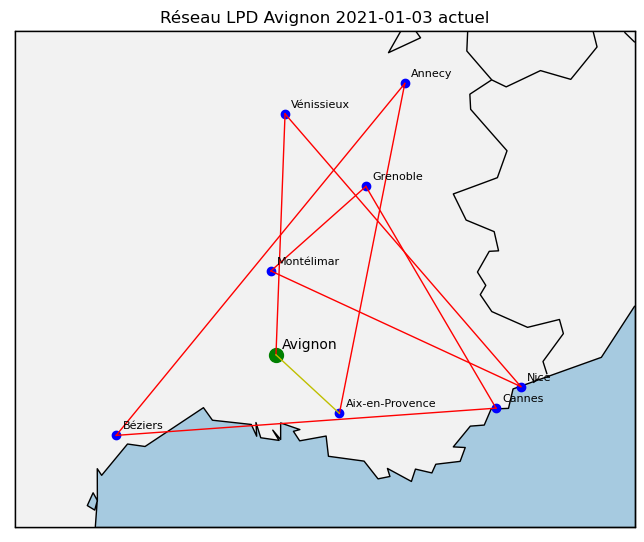

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Créer la carte de France
plt.figure(figsize=(8, 8))
map = Basemap(projection='lcc', resolution='l', width=5E5, height=4E5, lat_0=44.5, lon_0=5.3)

# Tracer les frontières et les côtes de la France
map.drawcoastlines()
map.drawcountries(linewidth=1, color='black')
map.fillcontinents(color='#f2f2f2', lake_color='#8080FF')
map.drawmapboundary(fill_color='#a6cae0')



# Tracer les villes visitées
for i in range(len(cities.city)):
    lat, lon = cities.lat[i], cities.lng[i]
    x, y = map(lon, lat)
    if cities.city[i]=='Avignon':
        plt.plot(x, y, 'go', markersize=10)
        plt.text(x+5000, y+5000, cities.city[i], fontsize=10)
    elif cities.city[i] in villes_sud:
        plt.plot(x, y, 'bo', markersize=6)
        plt.text(x+5000, y+5000, cities.city[i], fontsize=8)
    
# Tracer les trajets réalisés


for i in range(len(routes_a1[0])-1):
    start_city, end_city = routes_a1[0][i], routes_a1[0][i+1]
    start_lat, start_lon = get_latitude(start_city), get_longitude(start_city)
    end_lat, end_lon = get_latitude(end_city), get_longitude(end_city)
    start_x, start_y = map(float(start_lon), float(start_lat))
    end_x, end_y = map(float(end_lon), float(end_lat))
    plt.plot([start_x, end_x], [start_y, end_y], 'r-', linewidth=1)

for i in range(len(routes_a1[1])-1):
    start_city, end_city = routes_a1[1][i], routes_a1[1][i+1]
    start_lat, start_lon = get_latitude(start_city), get_longitude(start_city)
    end_lat, end_lon = get_latitude(end_city), get_longitude(end_city)
    start_x, start_y = map(float(start_lon), float(start_lat))
    end_x, end_y = map(float(end_lon), float(end_lat))
    plt.plot([start_x, end_x], [start_y, end_y], 'y-', linewidth=1)
    
# Afficher la carte
plt.title('Réseau LPD Avignon 2021-01-03 actuel')
plt.show()   

VRAI ESSAI

In [26]:
from geopy import distance

# Coordonnées géographiques des villes
coords = {
    'Avignon': (43.948, 4.808), #0
    'Annecy': (45.8992, 6.1294), #1
    'Vénissieux': (45.697, 4.886), #2
    'Grenoble': (45.1885, 5.7245), #3
    'Montélimar': (44.5599, 4.7517), #4
    'Nice': (43.7034, 7.2663), #5
    'Cannes': (43.5528, 7.0174), #6
    'Aix-en-Provence': (43.5299, 5.4474), #7
    'Béziers': (43.3442, 3.2156) #8
}

# Initialiser la matrice de distances avec des zéros
n = len(coords)
avi_matrix = [[0] * n for _ in range(n)]

# Calculer les distances entre chaque paire de villes
for i, (ville1, coord1) in enumerate(coords.items()):
    for j, (ville2, coord2) in enumerate(coords.items()):
        if i < j:
            dist = distance.distance(coord1, coord2).km
            avi_matrix[i][j] = dist
            avi_matrix[j][i] = dist


In [27]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


In [28]:
"""Simple Vehicles Routing Problem (VRP).

   This is a sample using the routing library python wrapper to solve a VRP
   problem.
   A description of the problem can be found here:
   http://en.wikipedia.org/wiki/Vehicle_routing_problem.

   Distances are in meters.
"""



def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = avi_matrix
    data['num_vehicles'] = 5
    data['depot'] = 0
    return data




In [29]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))




In [30]:

def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        900,  # vehicle maximum travel distance => pour respecter la limite de 9h de travail par jour (100km/h)
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
    else:
        print('No solution found !')
    
    # itinéraires de chaque véhicule
    routes_a1_opti = []
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        route = []
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route.append(node_index)
            index = solution.Value(routing.NextVar(index))
        route.append(0)  # Ajouter le nœud de départ à la fin de l'itinéraire
        routes_a1_opti.append(route)

    # Afficher les itinéraires de chaque véhicule
    print(routes_a1_opti)


if __name__ == '__main__':
    main()

Objective: 49576
Route for vehicle 0:
 0 ->  8 -> 0
Distance of the route: 288m

Route for vehicle 1:
 0 ->  4 ->  2 -> 0
Distance of the route: 388m

Route for vehicle 2:
 0 -> 0
Distance of the route: 0m

Route for vehicle 3:
 0 ->  7 ->  6 ->  5 -> 0
Distance of the route: 420m

Route for vehicle 4:
 0 ->  3 ->  1 -> 0
Distance of the route: 480m

Maximum of the route distances: 480m
[[0, 8, 0], [0, 4, 2, 0], [0, 0], [0, 7, 6, 5, 0], [0, 3, 1, 0]]


9h = limite légale pour conducteur routier par jour

Visualisation

In [32]:
villes_ordered = ['Avignon', 'Annecy', 'Vénissieux', 'Grenoble', 'Montélimar', 'Nice', 'Cannes', 'Aix-en-Provence', 'Béziers']

In [33]:
routes_a1_opti_num = [[0, 8, 0], [0, 4, 2, 0], [0, 0], [0, 7, 6, 5, 0], [0, 3, 1, 0]]
routes_a1_opti_villes=[]
l=[]
for k in routes_a1_opti_num:
    for i in k:
        l.append(villes_ordered[i])
    routes_a1_opti_villes.append(l)
    l=[]
routes_a1_opti_villes

[['Avignon', 'Béziers', 'Avignon'],
 ['Avignon', 'Montélimar', 'Vénissieux', 'Avignon'],
 ['Avignon', 'Avignon'],
 ['Avignon', 'Aix-en-Provence', 'Cannes', 'Nice', 'Avignon'],
 ['Avignon', 'Grenoble', 'Annecy', 'Avignon']]

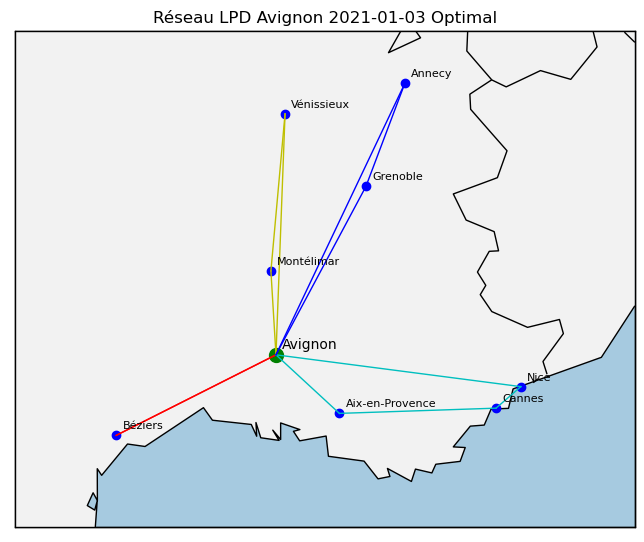

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Créer la carte de France
plt.figure(figsize=(8, 8))
map = Basemap(projection='lcc', resolution='l', width=5E5, height=4E5, lat_0=44.5, lon_0=5.3)

# Tracer les frontières et les côtes de la France
map.drawcoastlines()
map.drawcountries(linewidth=1, color='black')
map.fillcontinents(color='#f2f2f2', lake_color='#8080FF')
map.drawmapboundary(fill_color='#a6cae0')



# Tracer les villes visitées
for i in range(len(cities.city)):
    lat, lon = cities.lat[i], cities.lng[i]
    x, y = map(lon, lat)
    if cities.city[i]=='Avignon':
        plt.plot(x, y, 'go', markersize=10)
        plt.text(x+5000, y+5000, cities.city[i], fontsize=10)
    elif cities.city[i] in villes_sud:
        plt.plot(x, y, 'bo', markersize=6)
        plt.text(x+5000, y+5000, cities.city[i], fontsize=8)
    
# Tracer les trajets réalisés
colors=['r','y','m','c','b','g','k']
for k in range(len(routes_a1_opti_villes)):
    color=colors[k]
    for i in range(len(routes_a1_opti_villes[k])-1):
        start_city, end_city = routes_a1_opti_villes[k][i], routes_a1_opti_villes[k][i+1]
        start_lat, start_lon = get_latitude(start_city), get_longitude(start_city)
        end_lat, end_lon = get_latitude(end_city), get_longitude(end_city)
        start_x, start_y = map(float(start_lon), float(start_lat))
        end_x, end_y = map(float(end_lon), float(end_lat))
        plt.plot([start_x, end_x], [start_y, end_y], color, linewidth=1)

# Afficher la carte
plt.title('Réseau LPD Avignon 2021-01-03 Optimal')
plt.show()   

Calcul distances

In [42]:
n=0
for k in routes_a1:
    for i in range(len(k)-1):
        n += disti[k[i]][k[i+1]]
n

2032.061382

In [41]:
n_opti=0
for k in routes_a1_opti_villes:
    for i in range(len(k)-1):
        n_opti += disti[k[i]][k[i+1]]
n_opti

1584.523459

Camions électriques

In [49]:
len(M)

17

In [50]:
len(M[0])

17

In [51]:
len(d_matrix)

100

In [52]:
len(d_matrix[0])

100

In [39]:
n=0
emi=0
for i in range(len(routes.total_distance)):
    if routes.total_distance[i]<600:
        emi+=routes.total_distance[i]
        n+=1
n

5587

In [33]:
m=7426

In [40]:
n/m

0.752356584971721

In [41]:
emi

1344337.6545174865

In [36]:
tot=0
for i in range(len(routes.total_distance)):
    tot+=routes.total_distance[i]
tot

3063971.652554649

In [42]:
emi/tot

0.4387565574885843